In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('data.csv')
data1=data

### Data Preparation for Future Forecasting

In [3]:
new = data['Unnamed: 0'].str.split("X", expand = True)
new1 = new.iloc[:,1].str.split(".",expand=True)
for i in range(11500):
        if new1[2][i]==None:
            new1[2][i]=new1[1][i]
data['Time']=new1.iloc[:,0]
data['V']=new1.iloc[:,1]
data['ID']=new1.iloc[:,2]

In [4]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X173,X174,X175,X176,X177,X178,y,Time,V,ID
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-77,-103,-127,-116,-83,-51,4,21,V1,791
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,152,157,156,154,143,129,1,15,V1,924
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,19,-12,-30,-35,-35,-36,5,8,V1,1
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-77,-85,-77,-72,-69,-65,5,16,V1,60
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,-32,-41,-65,-83,-89,-73,5,20,V1,54


In [5]:
new_data=data.iloc[:,1:-3]
new_data['ID']=data['ID']
new_data['Time']=data['Time']
new_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X172,X173,X174,X175,X176,X177,X178,y,ID,Time
0,135,190,229,223,192,125,55,-9,-33,-38,...,-31,-77,-103,-127,-116,-83,-51,4,791,21
1,386,382,356,331,320,315,307,272,244,232,...,146,152,157,156,154,143,129,1,924,15
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,48,19,-12,-30,-35,-35,-36,5,1,8
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-77,-85,-77,-72,-69,-65,5,60,16
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,-12,-32,-41,-65,-83,-89,-73,5,54,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,12,5,-1,-18,-37,-47,-48,2,114,22
11496,-47,-11,28,77,141,211,246,240,193,136,...,-7,14,27,48,77,117,170,1,354,19
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-61,-62,-67,-30,-2,-1,-8,5,28,8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,148,143,116,86,68,59,55,3,932,10


In [6]:
X=data[data['ID']=='273'] #791 is the Patient ID 
X[['Time']] = X[['Time']].apply(pd.to_numeric) 
X=X.sort_values(by=['Time'])
X=X.drop(['Unnamed: 0','V','y','ID'],axis=1)
X=X.set_index('Time')
X=X.T

C:\Users\65905\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:
list1=[]
for i in range(1,24):
    list1.append(X[i])
import itertools
merged = list(itertools.chain.from_iterable(list1))
DataFrame=pd.DataFrame(merged)
DataFrame.index+=1
DataFrame

,0
1,36
2,30
3,24
4,17
5,6
...,...
4090,-71
4091,-68
4092,-60
4093,-48


### Time Series Analysis

In [8]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from matplotlib import rcParams
rcParams["figure.figsize"]=10,6

In [9]:
#Performing the dicky fuller test and rolling statistics test
from statsmodels.tsa.stattools import adfuller
def test_stationary(df):
  
  rolmean=df.rolling(window=178).mean()
  rolstd=df.rolling(window=178).std()

  org=plt.plot(df,color='blue',label='Original')
  mean=plt.plot(rolmean,color='green',label='Rolling mean')
  std=plt.plot(rolstd,color='orange',label='Rolling std')
  plt.legend(loc='best')
  plt.title("Rolling statistics")
  plt.show(block=False)
  dftest=adfuller(df, autolag="AIC")
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags used','Number of Observations Used'])

  for key,value in dftest[4].items():
      dfoutput["critical value (%s)"%key]=value
  print(dfoutput)

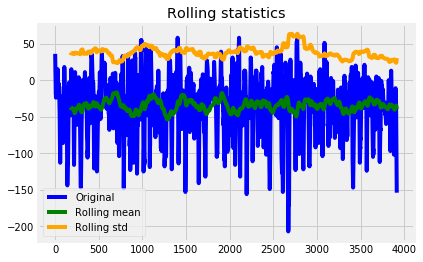

Test Statistic                -1.102534e+01
p-value                        5.847284e-20
#Lags used                     3.100000e+01
Number of Observations Used    3.884000e+03
critical value (1%)           -3.432035e+00
critical value (5%)           -2.862284e+00
critical value (10%)          -2.567166e+00
dtype: float64


In [10]:
train=DataFrame[0][:3916]
test=DataFrame[0][3916:]
test=test.reset_index()
test_stationary(train)

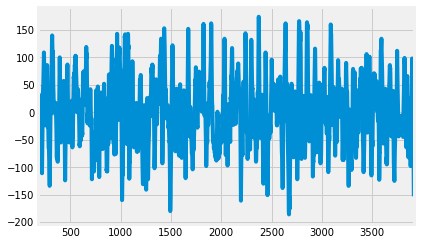

In [11]:
train = train - train.shift(178)
X=train.dropna()
X.plot()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(X,freq=178)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

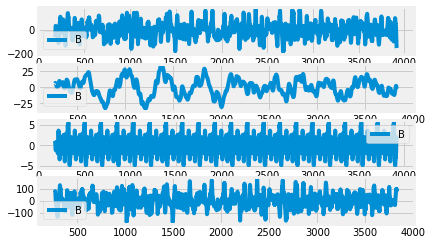

In [13]:
plt.subplot(411)
plt.plot(X,label='Original')
plt.legend('Best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend('Best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend('Best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend('Best')

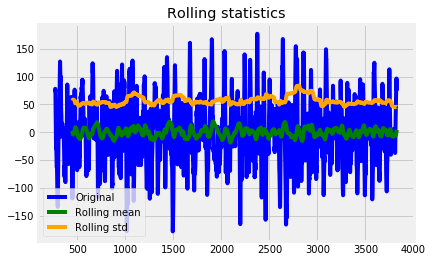

Test Statistic                -1.090501e+01
p-value                        1.133947e-19
#Lags used                     3.000000e+01
Number of Observations Used    3.529000e+03
critical value (1%)           -3.432204e+00
critical value (5%)           -2.862359e+00
critical value (10%)          -2.567206e+00
dtype: float64


In [14]:
decomposed=pd.Series(residual)
decomposed.dropna(inplace=True)
test_stationary(decomposed)

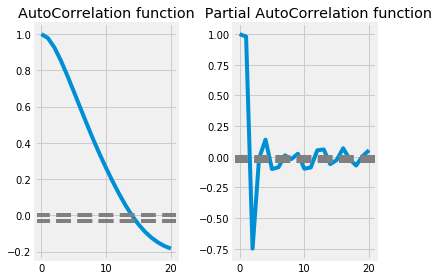

In [15]:
#Predict ACF,PACF

from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(X,nlags=20)
lag_pacf=pacf(X,nlags=20,method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.title("AutoCorrelation function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.title("      Partial AutoCorrelation function")
plt.tight_layout()

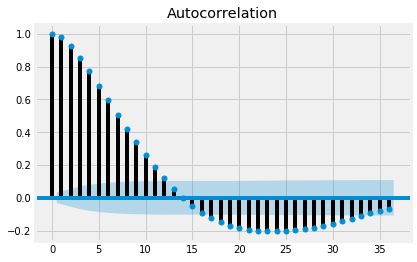

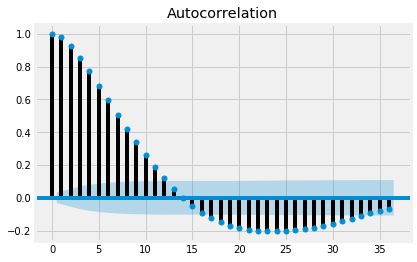

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(X)#to get value of p

### From this, we can infer that the value of p is 1

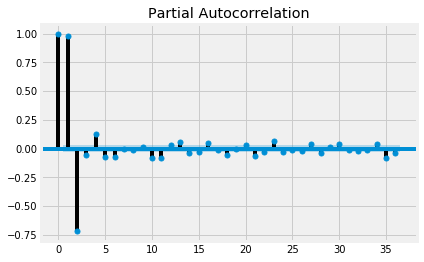

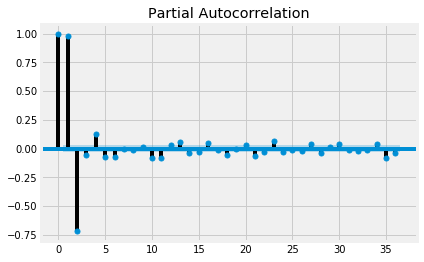

In [17]:
plot_pacf(X)#to get value of q

### From this, we can infer that the value of q is 1

C:\Users\65905\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'ARIMA model')

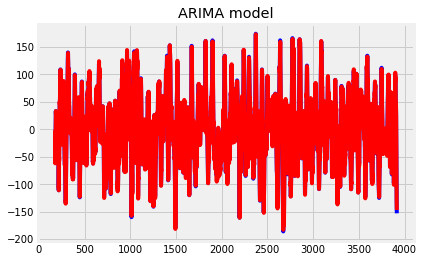

In [18]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(X,order=(1,0,1))
result=model.fit(disp=1)
plt.plot(X,color='blue')
plt.plot(result.fittedvalues,color='red')
plt.title('ARIMA model')

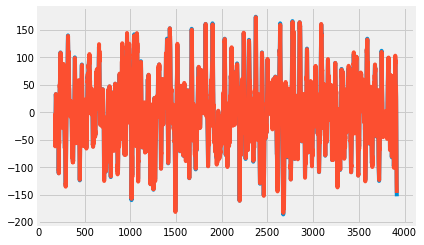

In [19]:
predictions=pd.Series(result.fittedvalues,copy=True)
predictions1=predictions.cumsum()
plt.plot(X)
plt.plot(predictions)

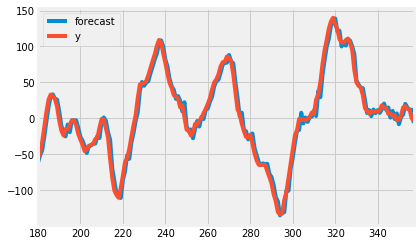

In [20]:
result.plot_predict(1,178)
x=result.forecast(178)

In [21]:
output=[round(x,0) for x in x[0]]

In [22]:
test=test[0]

In [23]:
count=0
error=0
for i in range(len(test)):
    if test[i]!=0:
        error+=test[i]-output[i]
        error/=test[i]
        count+=1
print("Error Rate: ",error/count)

Error Rate:  0.005096322681574365


In [24]:
from scipy import fftpack
X=data1.iloc[:,1:179].values #Removed all the ID's of patients and the label from the dataset to create the features
Y=data1.iloc[:,179:180].values #Contains all the  labels(output)
for i in range(len(X)):
    X[i]=fftpack.fft(X[i])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) 

In [25]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
test=pd.DataFrame(test).T
output=pd.DataFrame(output).T
y_test_pred=nb.predict(test)
y_output_pred=nb.predict(output)


In [26]:
y_output_pred==y_test_pred

array([ True])

### From this, we can infer that with the predicted future values of the EEG, we were able to predict the same Y value as we did with the EEG reading. This can be used to find the EEG readings of a person in the near future and using that, we'll be able to predict whether they have seizure or not